## Swiggy Dataset Analysis
In this project, we conduct a comprehensive analysis of restaurant data collected from Swiggy, one of India's leading online food delivery platforms. The dataset includes various attributes related to restaurants, such as their average ratings, total ratings, pricing, food types, and delivery times. Our goal is to extract meaningful insights that can help both consumers and restaurant owners make informed decisions.

### Dataset Description
The dataset contains the following columns:

* ID: Unique identifier for each restaurant.
* Area: The area where the restaurant is located.
* City: The city in which the restaurant operates.
* Restaurant: Name of the restaurant.
* Price: Average price of food items in the restaurant (in local currency).
* Avg ratings: Average customer rating for the restaurant (out of 5).
* Total ratings: Total number of ratings received by the restaurant.
* Food type: Types of cuisine offered by the restaurant.
* Address: Detailed address of the restaurant.
* Delivery time: Average time taken for delivery (in minutes).

**Import necessary libraries**

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



**Load Dataset**

In [7]:
df = pd.read_csv(r"C:\Users\carol\OneDrive\Desktop\Projects\Swiggy\swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


**Exploring the Dataset**

In [11]:
df.shape

(8680, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [7]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


**Handling the Missing Values**

In [9]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

**Converting the Data Types**

In [11]:
df['Price'] = df['Price'].astype(float)
df['Avg ratings'] = df['Avg ratings'].astype(float)
df['Total ratings'] = df['Total ratings'].astype(int)
df['Delivery time'] = df['Delivery time'].astype(int)

### EDA

**Distribution of Price**

Text(0, 0.5, 'Frequency')

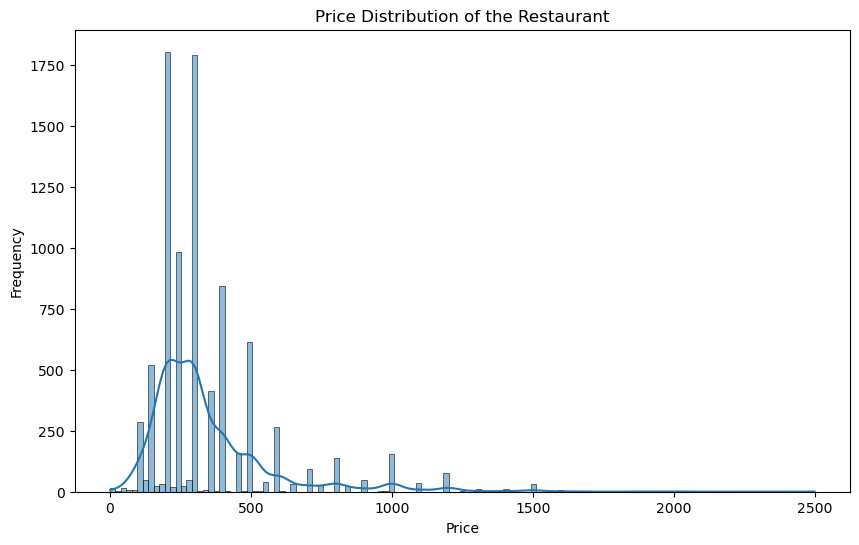

In [23]:
plt.figure(figsize =(10,6))

sns.histplot(df['Price'], kde = True)
plt.title("Price Distribution of the Restaurant")
plt.xlabel("Price")
plt.ylabel("Frequency")



**Distribution of Ratings**

Text(0, 0.5, 'Frequency')

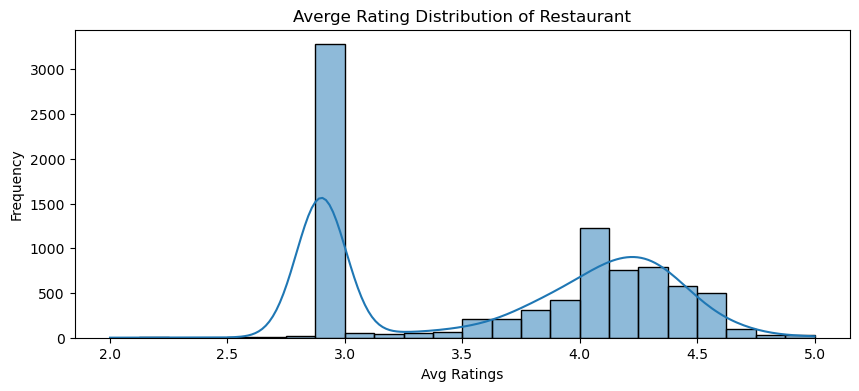

In [41]:
plt.figure(figsize = (10,4))

sns.histplot(df['Avg ratings'], kde = True)

plt.title("Averge Rating Distribution of Restaurant")
plt.xlabel("Avg Ratings")
plt.ylabel("Frequency")

**Counts of Restaurants by Cities**

<Axes: title={'center': 'Number of Restaurant via cities'}, xlabel='City', ylabel='Number of restaurants'>

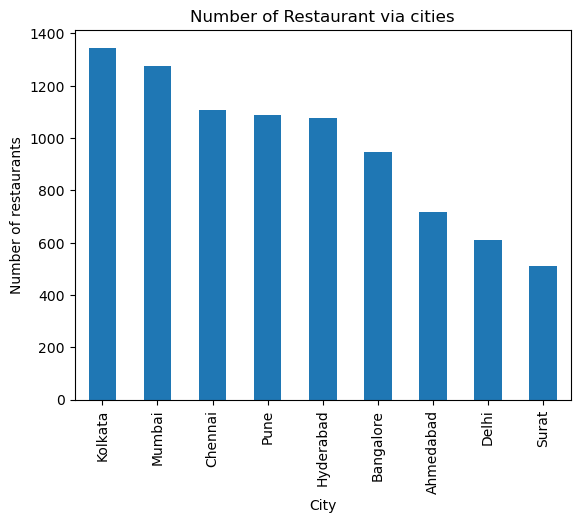

In [54]:
counts = df['City'].value_counts()
plt.title("Number of Restaurant via cities")
plt.xlabel("Cities")
plt.ylabel("Number of restaurants")


counts.plot(kind = "bar")

**Relationship btw Price and Ratings**

Text(0.5, 1.0, 'Price vs Avg ratings')

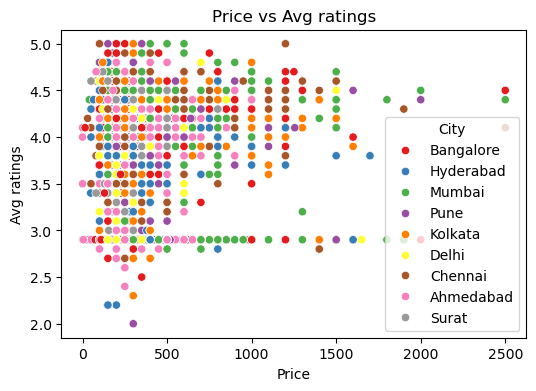

In [70]:
plt.figure(figsize = (6,4))

sns.scatterplot(x="Price", y = "Avg ratings", data = df,hue = 'City', palette = 'Set1')
plt.title("Price vs Avg ratings")

**Top Rated Restaurants**

<Axes: xlabel='Avg ratings', ylabel='Restaurant'>

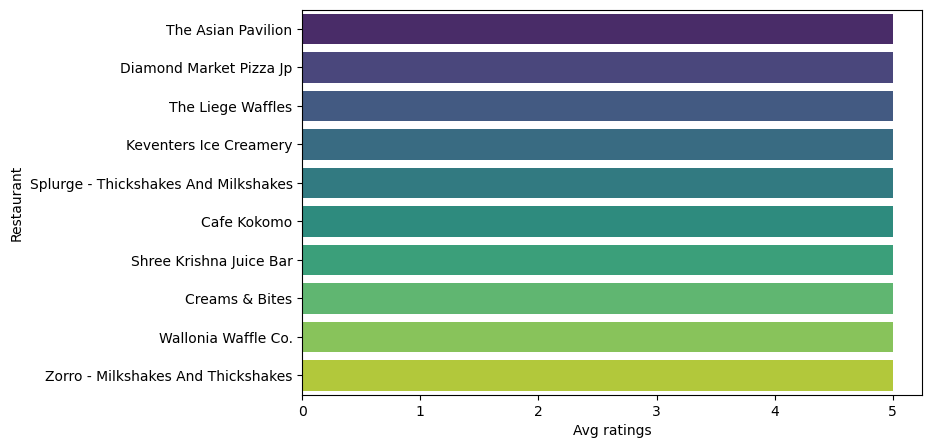

In [181]:
top_rated = df.sort_values(by = 'Avg ratings', ascending = False).head(10)


plt.figure(figsize = (8,5))
sns.barplot(x='Avg ratings', y='Restaurant', data=top_rated, palette='viridis')

**Count of Restaurants by food type**

Text(0, 0.5, '')

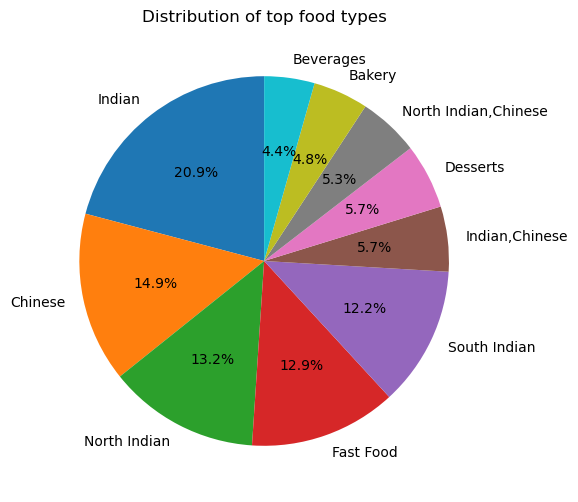

In [164]:
food_count = df['Food type'].value_counts()
top10 = food_count.head(10)

plt.figure(figsize=(12,6))
top10.plot(kind = "pie", autopct = '%1.1f%%',startangle = 90)
# autopct  to display % of each slice
plt.title("Distribution of top food types")
plt.ylabel("")

**Delivery Time Analysis**

Text(0, 0.5, 'Cities')

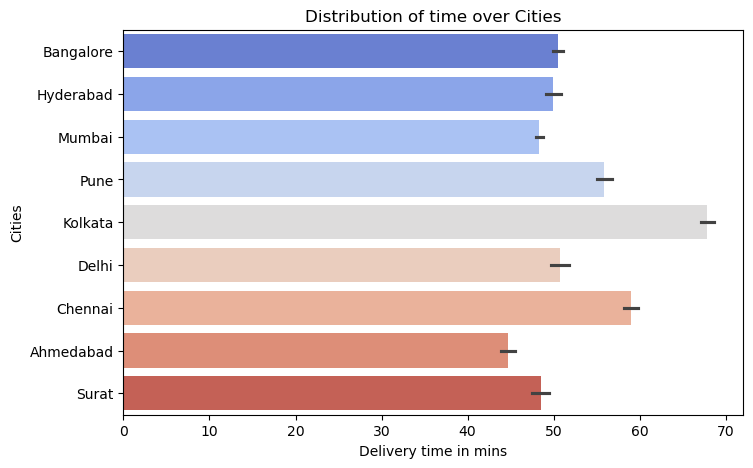

In [172]:
## Distribution

plt.figure(figsize = (8,5))
sns.barplot(x = 'Delivery time', y = 'City', data = df, palette = 'coolwarm')
plt.title("Distribution of time over Cities")
plt.xlabel("Delivery time in mins")
plt.ylabel("Cities")

**Price distribution by Cities**

Text(0, 0.5, 'Price')

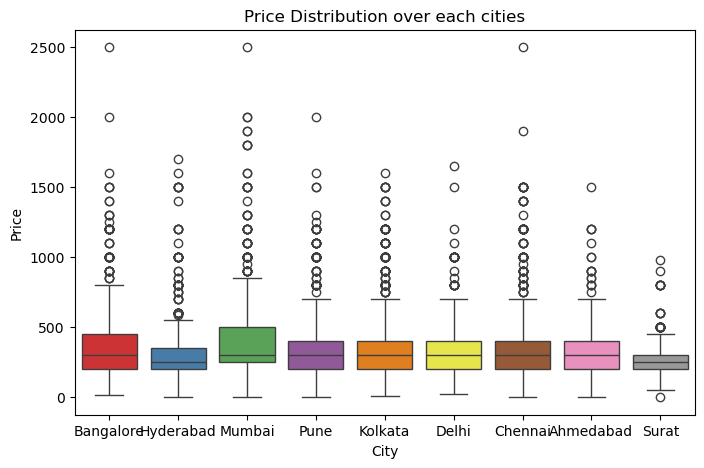

In [178]:


plt.figure(figsize =(8,5))
sns.boxplot(x = 'City',y = 'Price', data = df,palette = 'Set1')
plt.title("Price Distribution over each cities")
plt.xlabel("City")
plt.ylabel("Price")

**Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix')

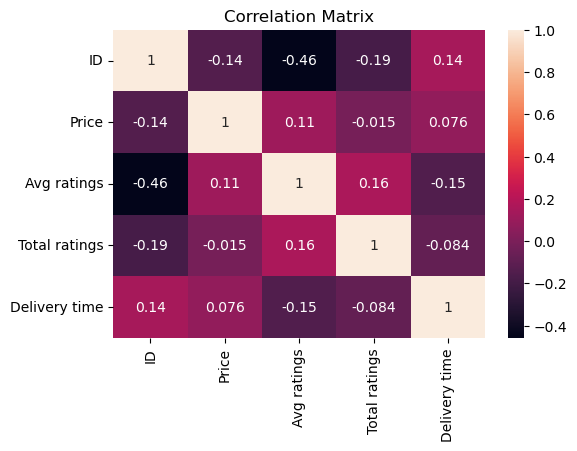

In [28]:
plt.figure(figsize = (6,4))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

plt.title("Correlation Matrix")